Projeto final do curso de Machine Learning da ADA
Autores:
Alexandre Paulino
Carolina Rutili de Lima
Hugo Cezar Sales de Souza
Lucas Meirelles

Para este projeto vamos usar o seguinte dataset:

https://www.kaggle.com/datasets/tavarez/the-orl-database-for-training-and-testing


O Banco de Dados ORL de Rostos é um conjunto de imagens faciais tiradas entre abril de 1992 e abril de 1994 no laboratório. O banco de dados foi usado no contexto de um projeto de reconhecimento facial realizado em colaboração com o Grupo de Fala, Visão e Robótica do Departamento de Engenharia da Universidade de Cambridge.

Há dez imagens diferentes de cada um dos 40 sujeitos distintos. Para alguns sujeitos, as imagens foram tiradas em diferentes momentos, variando a iluminação, expressões faciais (olhos abertos/fechados, sorrindo/não sorrindo) e detalhes faciais (óculos/sem óculos). Todas as imagens foram tiradas contra um fundo escuro homogêneo com os sujeitos em posição frontal e ereta (com tolerância para algum movimento lateral).

São 20 homens e 20 mulheres no dataset. E o que desejamos é conseguir realizar a classificação entre eles.


Existem 400 rostos, com dimensões de 46 × 56, de 40 pessoas.

Leitura das 400 imagens para uma matriz de dados de 400 × 2576. Crie uma coluna adicional de rótulos indicando o gênero físico, por exemplo, {0 = feminino, 1 = masculino}



○ Utilização do Scikit-learn

○ KNNs

○ Random Forests

○ Métricas de Avaliação de Modelos de Classificação

○ Otimização de hiperparâmetros

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy


gender = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [3]:
import os
print(os.getcwd())

c:\Users\Drac3\OneDrive\Desktop\Final_Project_Machine_Learning_I


In [4]:
from PIL import Image


folder = './images/'  # Updated folder path

def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder(folder)

pixels.shape

(400, 5600)

Regressando o rótulo de gênero em todos os 2576 pixels.

In [5]:
Y = gender
X = pixels

In [6]:
import statsmodels.api as sm

X_reg = sm.add_constant(X)
model = sm.OLS(Y,X_reg)
results = model.fit()

In [7]:
results.params

array([2.15568857e-06, 4.83164692e-05, 2.07274421e-05, ...,
       3.25743479e-05, 1.16551400e-04, 8.61888666e-05])

Realize a regressão passo a passo a partir de um modelo nulo para encontrar os pixels importantes. Plote os pixels escolhidos em uma tela de 46 × 56.

In [8]:
Y.shape
X.shape

(400, 5600)

In [10]:
import numpy as np
import statsmodels.api as sm

# Assuming X and Y are defined somewhere above and are numpy arrays
# X should be a 2D array (observations x pixels) and Y should be a 1D array (observations)

best_p = float('inf')
best_pixel = None

# Transpose X to access columns easily
X_transposed = X.T

for j in range(len(X_transposed)):
    Xs = sm.add_constant(X_transposed[j])  # Add constant to the model
    model = sm.OLS(Y, Xs)
    results = model.fit()
    p_value = results.pvalues[1]  # Get the p-value for the current pixel

    if p_value < best_p:
        best_p = p_value
        best_pixel = j

print(f"Best Pixel: {best_pixel}, Best P-Value: {best_p}")


Best Pixel: 1824, Best P-Value: 1.6131875247093263e-06


In [12]:
#first pixel

import statsmodels.api as sm

Xs= []
pvalues = []

for j in range(0,len(X)):
  for i in range(0,len(Y)):
    Xs.append(X[i][j]) 
  Xs = sm.add_constant(Xs)
  model_2 = sm.OLS(Y,Xs)
  results_each = model_2.fit()
  p_values = results_each.pvalues
  pvalues.append(p_values[1])

  Xs = []

    



In [13]:
# A Python program to find the first,
# second and third minimum element
# in an array
 
MAX = 100000
 
def Print3Smallest(arr, n):
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
 
    for i in range(0, n):
         
        # Check if current element
        # is less than firstmin,
        # then update first,second
        # and third
 
        if arr[i] < firstmin:
            thirdmin = secmin
            secmin = firstmin
            firstmin = arr[i]
            first = i
 
        # Check if current element is
        # less than secmin then update
        # second and third
        elif arr[i] < secmin:
            thirdmin = secmin
            secmin = arr[i]
            second = i
 
        # Check if current element is
        # less than,then update third
        elif arr[i] < thirdmin:
            thirdmin = arr[i]
            third = i
 
    print("First pixel = ", firstmin, "position = ", first)
    print("Second pixel = ", secmin, "position = ", second)
    print("Third pixel = ", thirdmin, "position = ", third)

    return first, second, third
 
 

n = len(pvalues)
first, second, third = Print3Smallest(pvalues, n)

pixels =  [first, second, third]


First pixel =  0.04054828430444952 position =  364
Second pixel =  0.04354810419281873 position =  365
Third pixel =  0.04792225319327901 position =  68


In [14]:
import math

x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

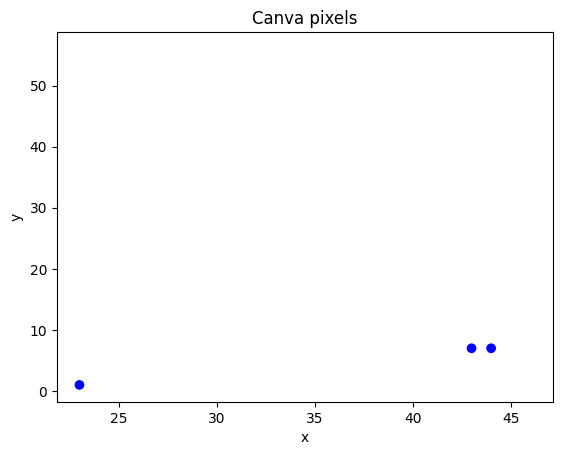

In [15]:
import matplotlib.pyplot as plt


#colors = np.random.rand(N)
colors=["b", "b", "b", "w"]

plt.scatter(x_pos,y_pos, c=colors)

plt.title('Canva pixels')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

LASSO

In [21]:
y = gender


C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.162e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Min MSE Lasso: 0.11930129584499509
Alpha with smallest value Lasso: 0.00999


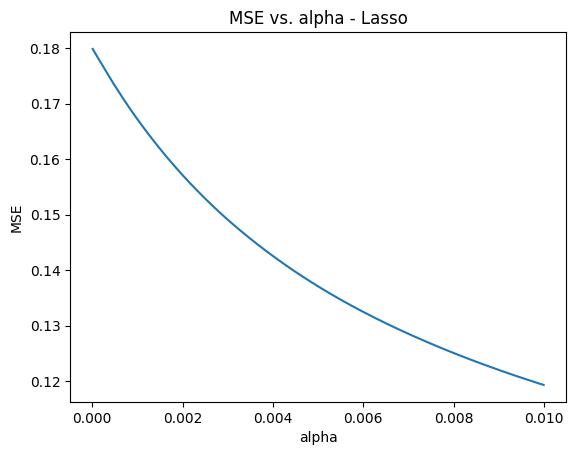

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are defined as your features and target variable respectively
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize X data

MSE = []  # List to store Mean Squared Errors
alphas = []  # List to store alpha values

for i in range(1, 1000):
    alpha = i / 100000
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y) 
    MSE.append(np.mean((lasso.predict(X_scaled) - y) ** 2))
    alphas.append(alpha)

# Finding the minimum MSE and corresponding alpha
min_mse = min(MSE)
index_alpha = MSE.index(min_mse)
best_alpha_lasso = alphas[index_alpha]

print("Min MSE Lasso:", min_mse)
print("Alpha with smallest value Lasso:", best_alpha_lasso)

# Plotting the MSE vs alpha
plt.title("MSE vs. alpha - Lasso")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas, MSE)
plt.show()


Min MSE Ridge: 4.4880566208774466e-17
Alpha with smallest value Ridge: 1e-05


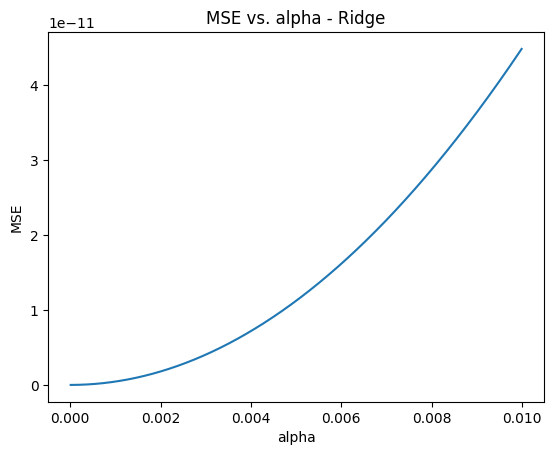

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are defined as your features and target variable respectively
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize X data

MSE = []  # List to store Mean Squared Errors
alphas = []  # List to store alpha values

for i in range(1, 1000):
    alpha = i / 100000
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y) 
    MSE.append(np.mean((ridge.predict(X_scaled) - y) ** 2))
    alphas.append(alpha)

# Finding the minimum MSE and corresponding alpha
min_mse = min(MSE)
index_alpha = MSE.index(min_mse)
best_alpha_ridge = alphas[index_alpha]

print("Min MSE Ridge:", min_mse)
print("Alpha with smallest value Ridge:", best_alpha_ridge)

# Plotting the MSE vs alpha
plt.title("MSE vs. alpha - Ridge")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas, MSE)
plt.show()


In [29]:
# stepwise regression

X_reg = sm.add_constant(X)
model = sm.OLS(y,X_reg)
results = model.fit()
MRS = np.mean((results.predict(X_reg) - y) ** 2)

print(MRS)

0.18
